# Visualize Dataset

The sole purpose of this notebook is to visualize the dataset generated during in the generator script. For that, we will use pandas and matplotlib

In [1]:
DATASET_LOCATION = "../dataset" # Specifies where the csv are located

In [2]:
import math, random, os
import pandas as pd
import matplotlib.pyplot as plt

## PointsSet Class

We will use this class again here to help parse the csv and reconstruct the data 

In [3]:
class PointsSet:
    def __init__(self, points, center, circ_no):
        self.points = points
        self.center = center if not math.isnan(circ_no) else None
        self.circ_no = circ_no if not math.isnan(circ_no) else None

    def add_point(self, point):
        self.points.append(point)

    def is_noise(self):
        return self.circ_no is None

    def __str__(self):
        if self.is_noise():
            return f"{len(self.points)} of Noise"
        else:
            return f"Circunference {self.circ_no} has {len(self.points)} points and center in {self.center}"

## Data extraction

The first step to represent the data is to extract it from the csv files. This time we have to take care of NaN values since comparing it to others will result on each noise point to be on its own set of points.

In [4]:
def extract_point_sets(df):
    data = []
    for index, row in df.iterrows():
        
        existing_ps = next(filter(lambda ps: ps.circ_no==row.circ_no if not math.isnan(row.circ_no) else ps.circ_no is None, data), None)
        if existing_ps is not None:
            existing_ps.add_point((row.point_x, row.point_y))
        else:
            data.append(PointsSet([(row.point_x, row.point_y)], (row.center_x, row.center_y), row.circ_no))
    return data

## Plotting

We define the function to plot the results. We want it to be in a 100x100 plane and assign different colors to the points depending on their circunference

In [5]:
def plot_data(data):
    points = []
    c = []
    for points_set in data:
        points.extend(points_set.points)
        
        # We set the color for the set, making sure its different for each set
        set_color = random.uniform(0, 100)
        while(set_color in c):
            set_color = random.uniform(0, 100)
        c.extend([set_color for _ in points_set.points])

    plt.figure()
    plt.scatter(*zip(*points), s=10, c=c)
    plt.xlim([0,100])
    plt.ylim([0,100])
    plt.gca().set_aspect('equal')
    plt.show()

## Show Data

Now we just iterate over all csv in the dataset and show them to the end user 

clean/1.csv


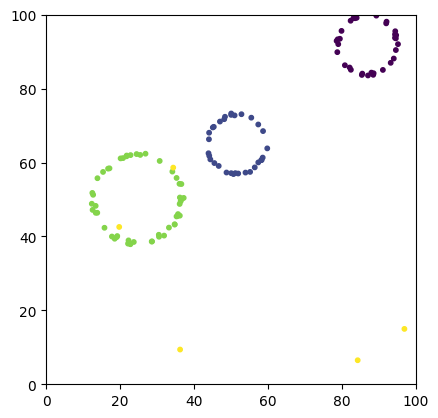

clean/2.csv


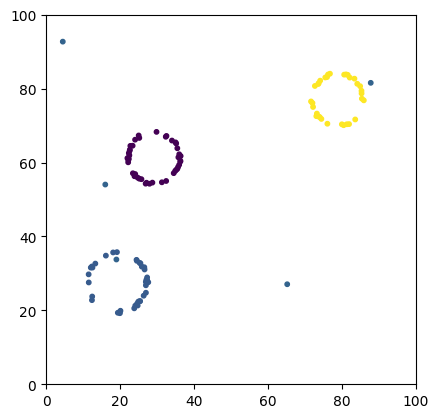

clean/3.csv


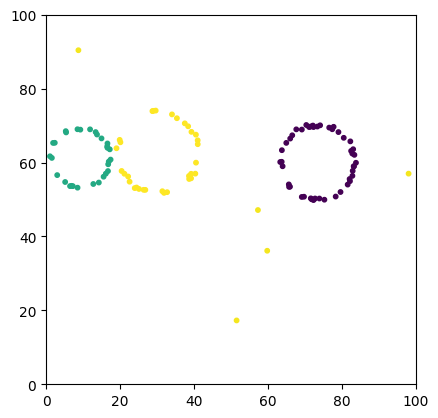

clean/4.csv


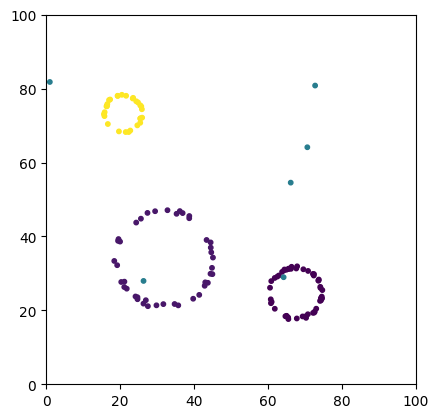

clean/5.csv


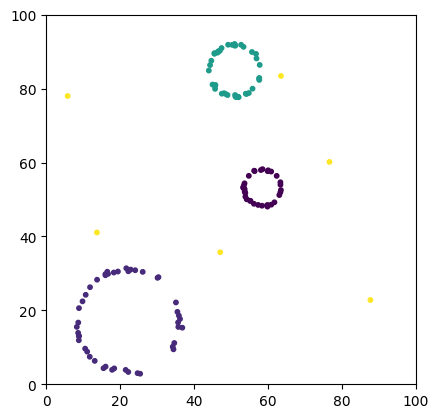

clean/6.csv


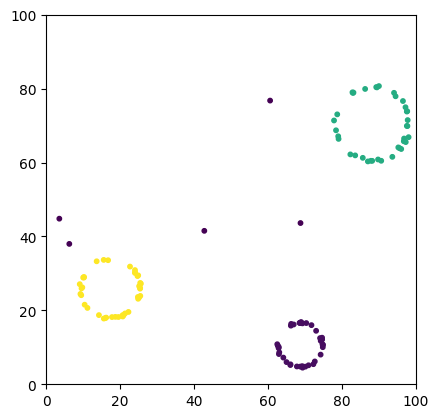

clean/7.csv


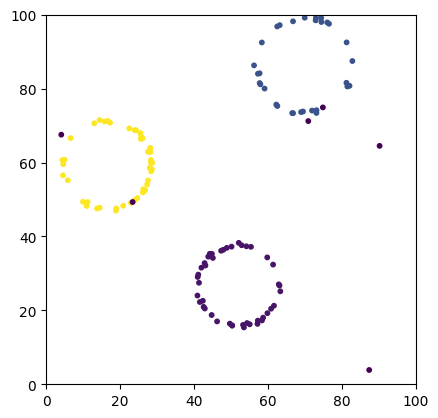

clean/8.csv


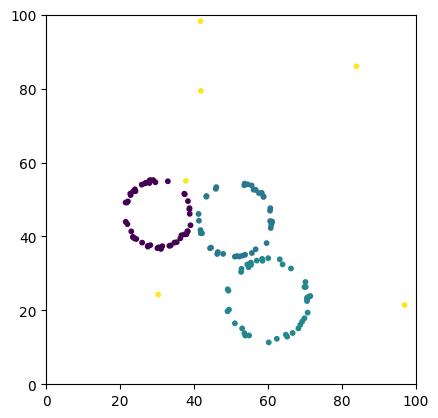

clean/9.csv


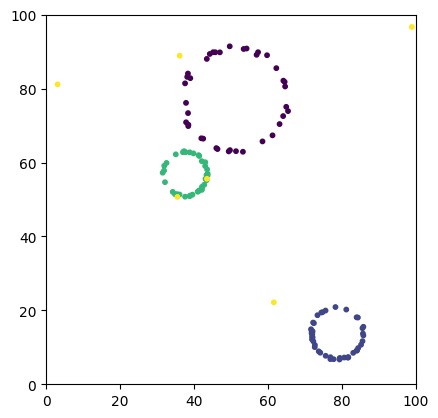

clean/10.csv


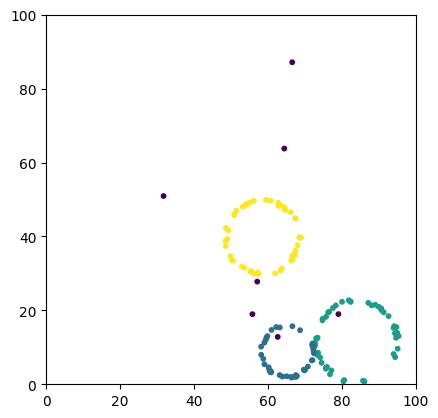

extends/1.csv


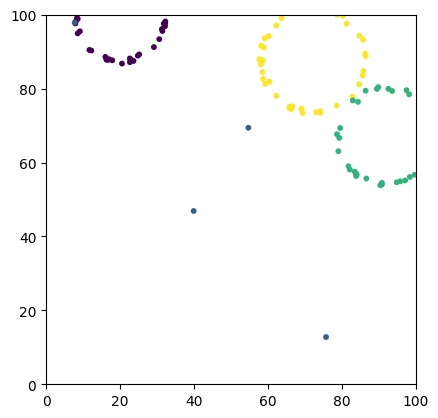

extends/2.csv


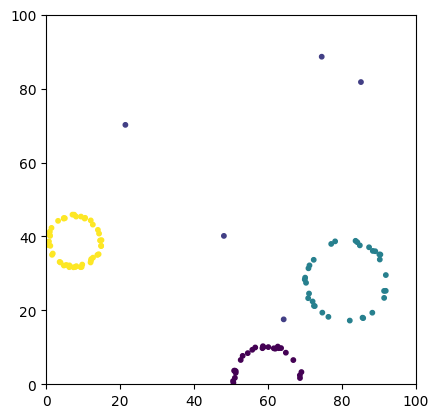

extends/3.csv


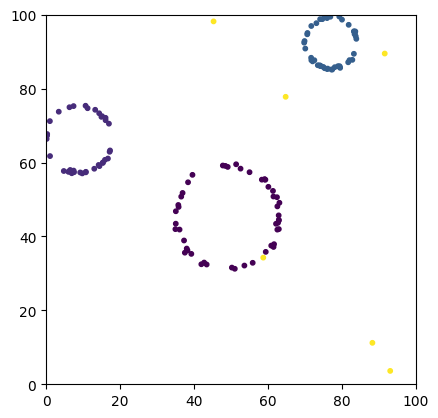

extends/4.csv


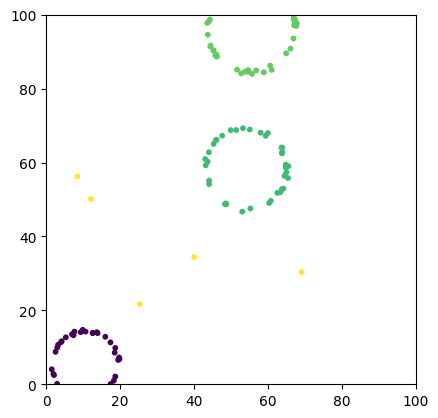

extends/5.csv


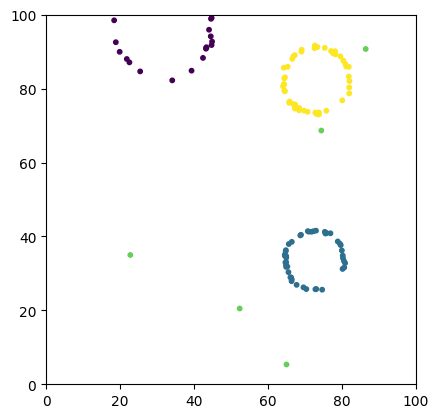

extends/6.csv


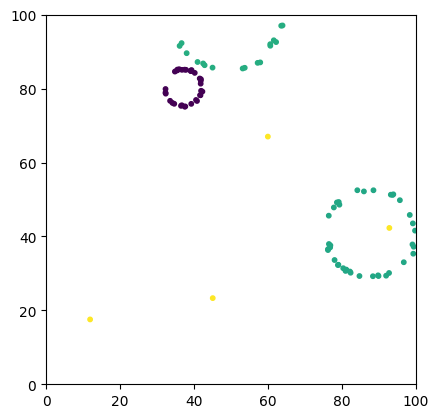

extends/7.csv


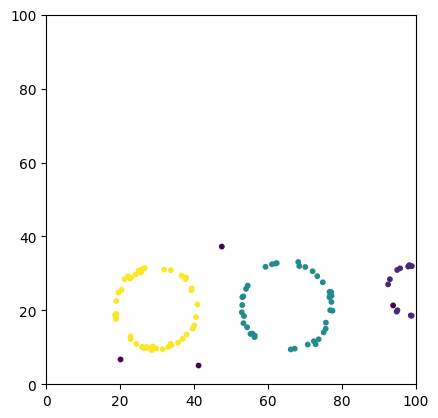

extends/8.csv


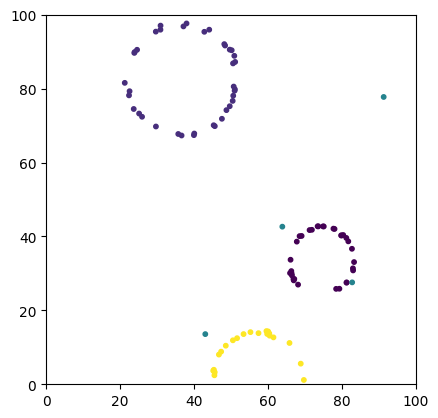

extends/9.csv


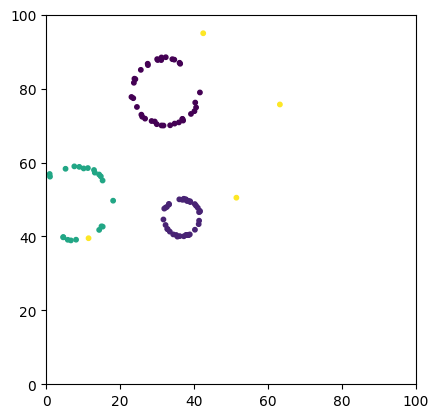

extends/10.csv


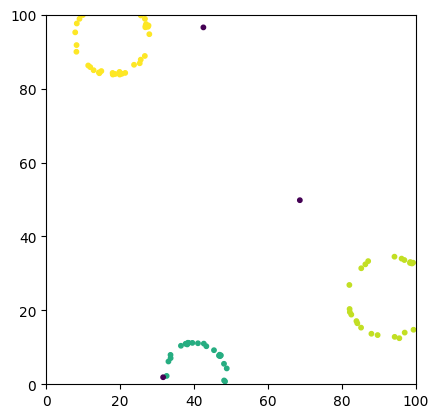

collides/1.csv


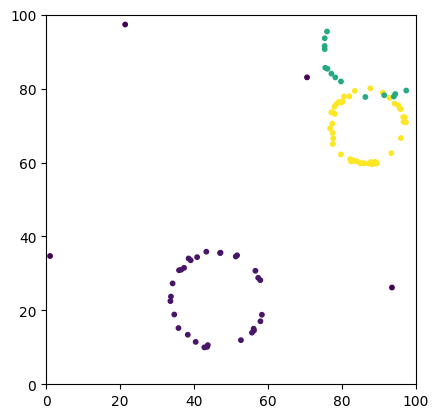

collides/2.csv


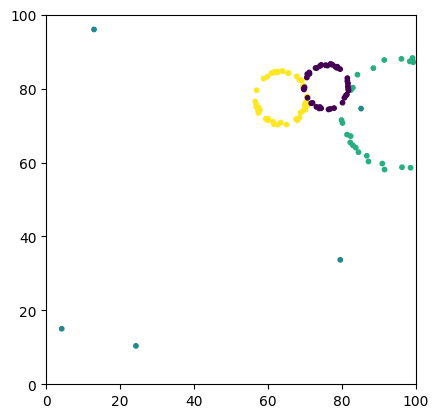

collides/3.csv


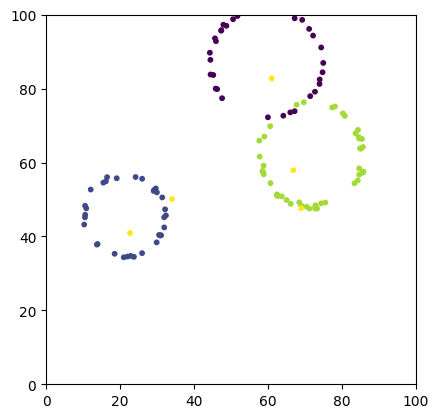

collides/4.csv


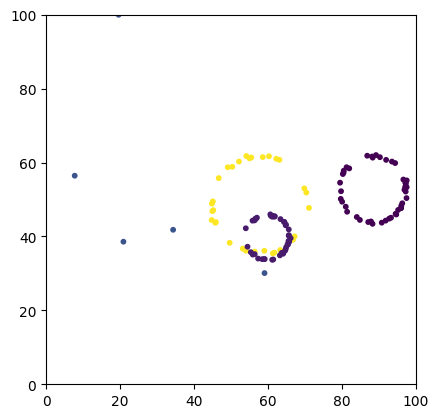

collides/5.csv


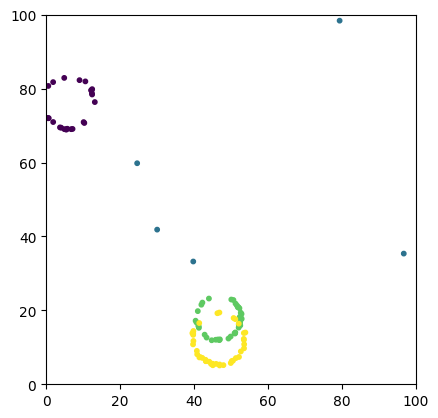

collides/6.csv


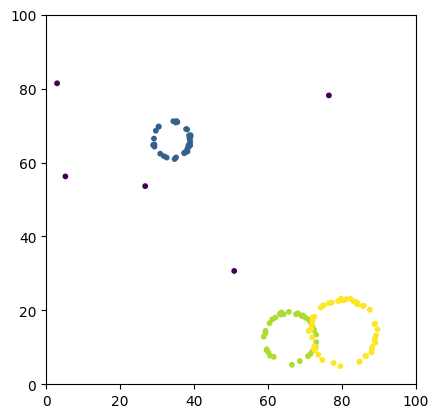

collides/7.csv


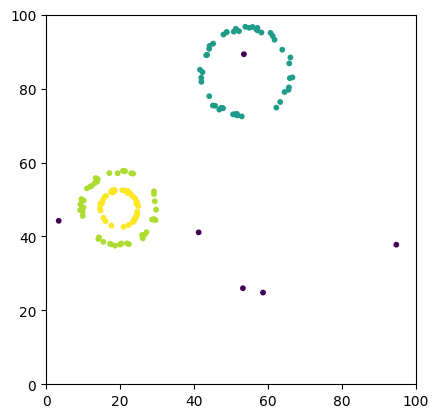

collides/8.csv


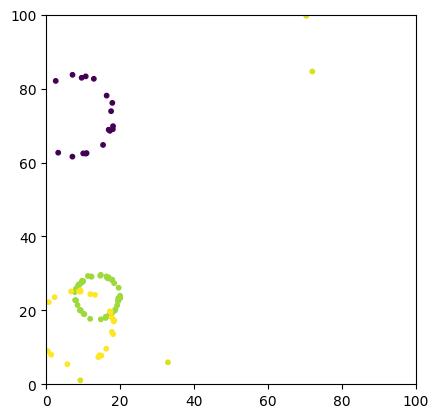

collides/9.csv


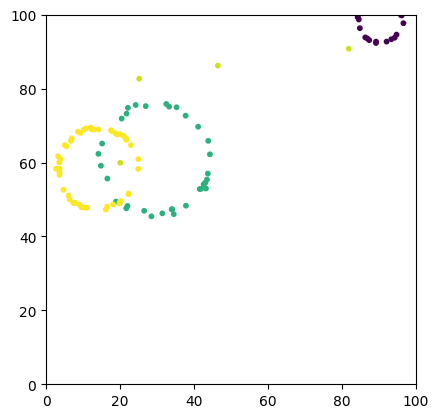

collides/10.csv


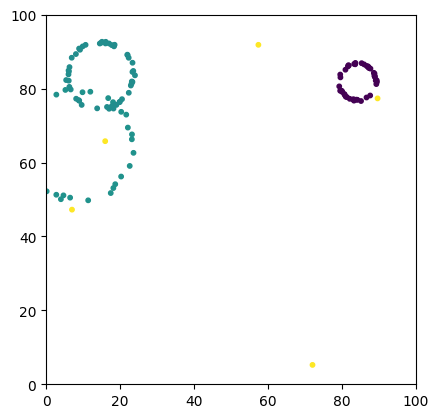

In [7]:
for set_type in ["clean", "extends", "collides"]:
    for filename in os.listdir(DATASET_LOCATION+f"/{set_type}"):
        if filename.endswith(".csv"): 
            df = pd.read_csv(f"{DATASET_LOCATION}/{set_type}/{filename}",header=0, sep=";")
            data = extract_point_sets(df)
            print(f"{set_type}/{filename}")
            plot_data(data)
